# Import Libraries

We will import the libraries needed for the data manipulation and visualization.

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Load the data

We have a CSV file containing the locations of the vessels with respective columns like **'vessel_id'**, **'timestamp'**, **'latitude'**, and **'longitude'**. Now, we will load this data into a pandas DataFrame.

In [3]:
#Load the data into a pandas DataFrame
df = pd.read_csv('/kaggle/input/sample-data-csv/sample_data.csv')

#Display the first 5 rows of the DataFrame
print(df.head(5))

        mmsi               timestamp       lat        lon
0  565761000  2023-03-15 00:27:44+00   1.26878  103.75827
1  538008084  2023-03-19 23:30:00+00  43.55962   10.29404
2  564654000  2023-03-12 08:22:53+00   1.23725  103.89135
3  529123000  2023-03-05 16:47:42+00  29.44367   48.93066
4  564780000  2023-03-11 06:35:20+00   1.27755  103.61026


# Calculate Distance Between Vessels

As instructed, we will use the Haversine formula to calculate the distance between two vessel locations. To do this, we will defile a function for the Haversine distance and then apply pandas vectorization method on it as mentioned in the assignment.

In [ ]:
# Define a function to calculate the Haversine distance
def haversine(lon1, lat1, lon2, lat2):
  # Convert latitude and longitude from degrees to radians
  lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

  # Haversine formula
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = np.sin(dlat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) ** 2
  c = 2 * np.arcsin(np.sqrt(a))

  # Radius of the Earth in kilometers (mean radius)
  r = 6371.0

  # Calculate the results
  return c * r

# Create a key column for Cartesian product
df['key'] = 1

# Perform a Cartesian product
df_pairs = df.merge(df, on='key', suffixes=('_1', '_2'))

# Remove self-pairs (where a vessel is paired with itself)
df_pairs = df_pairs[df_pairs['mmsi_1'] != df_pairs['mmsi_2']]

# Calculate distances in a vectorized manner
df_pairs['distance'] = haversine(
    df_pairs['latitude_1'], df_pairs['longitude_1'],
    df_pairs['latitude_2'], df_pairs['longitude_2']
    )

# Display the DataFrame with calculated distances
print(df_pairs.head())


# Filter Close Proximities

Next, we will filter the data to find vessels that lie within a certain proximity distance. Let's assume we are interested in vessels that are within 1 km of each other.

In [5]:
# Set the proximity threshold in kilometers
proximity_threshold = 1.0

# Filter vessels within the proximity threshold
close_proximity_df = df_pairs[df_pairs['distance'] <= proximity_threshold]

# Display the vessels in close proximity
print(close_proximity_df.head())

        mmsi_1             timestamp_1    lat_1      lon_1  key     mmsi_2  \
49   565761000  2023-03-15 00:27:44+00  1.26878  103.75827    1  563014650   
61   565761000  2023-03-15 00:27:44+00  1.26878  103.75827    1  563014650   
84   565761000  2023-03-15 00:27:44+00  1.26878  103.75827    1  564654000   
119  565761000  2023-03-15 00:27:44+00  1.26878  103.75827    1  564654000   
150  565761000  2023-03-15 00:27:44+00  1.26878  103.75827    1  564654000   

                timestamp_2     lat_2       lon_2  distance  
49   2023-03-06 02:30:00+00  1.288032  103.764301  0.842030  
61   2023-03-05 23:17:05+00  1.271930  103.755390  0.330896  
84   2023-03-08 21:02:41+00  1.291520  103.760770  0.662553  
119  2023-03-07 01:30:00+00  1.291414  103.760364  0.642268  
150  2023-03-12 18:22:37+00  1.267880  103.761320  0.339979  


# Visualize the result

Finally, we will visualize the positions of the vessels and highlight those in close proximity. We will use Matplotlib and Seaborn for this.



KeyError: 'longitude_1'

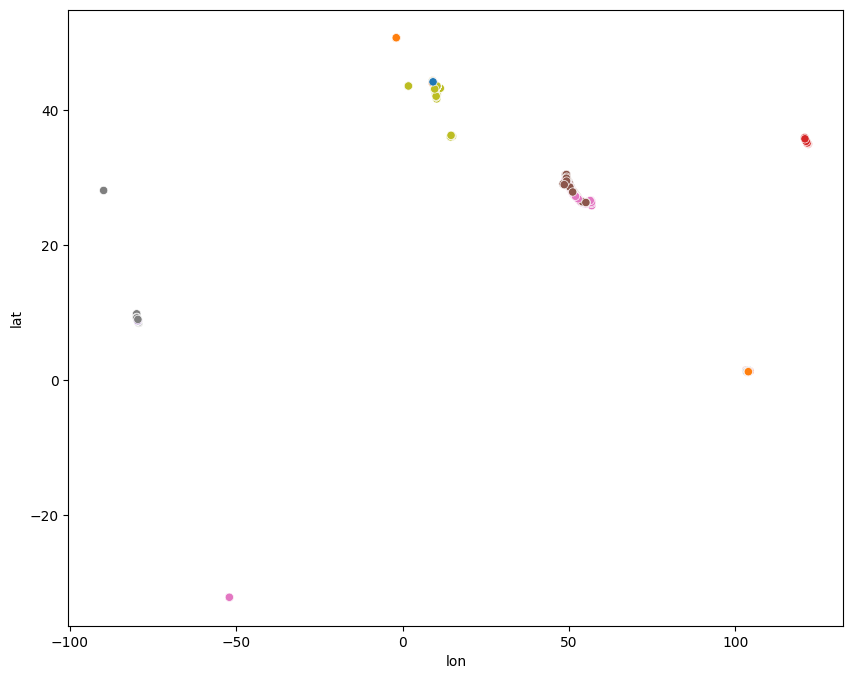

In [6]:
# Create a scatter plot for vessel positions
# fig = px.scatter(df, x='lon', y='lat', color='mmsi', title='Marine Vessel Positions')

# # Add lines for vessels in close proximity
# for _, row in close_proximity_df.iterrows():
#     fig.add_trace(go.Scattergeo(
#         lon=[row['lon_1'], row['lon_2']],
#         lat=[row['lat_1'], row['lat_2']],
#         mode='lines',
#         line=dict(color='red', width=1),
#         showlegend=False
#     ))

# # Update layout for better visualization
# fig.update_layout(
#     geo=dict(
#         projection_type="equirectangular",
#         showland=True,
#         landcolor="rgb(217, 217, 217)",
#         subunitcolor="rgb(255, 255, 255)",
#         countrycolor="rgb(255, 255, 255)"
#     ),
#     title={
#         'text': "Vessel Positions and Proximity Events",
#         'y':0.9,
#         'x':0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'
#     }
# )
# # Show the plot
# fig.show()


# # # Plot all vessel positions
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='lon', y='lat', hue='mmsi', palette='tab10', legend=None)

# Highlight vessels in close proximity
for _, row in close_proximity_df.iterrows():
    plt.plot([row['longitude_1'], row['longitude_2']], [row['latitude_1'], row['latitude_2']],'r-', alpha=0.6)

# Add labels and title
plt.title('Marine Vessel Positions and Close Proximities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Show plot
plt.show()
